# ANALISIS ARCHIVO VENTAS DE VIDEO JUEGOS

## Objetivo

El objetivo consiste en examinar la base de datos de ventas de videojuegos entre 1980 y 2017 en las regiones de Norte América, Europa, Japón y otras áreas, con el fin de evaluar las tendencias de ventas y detectar oportunidades que favorezcan su incremento. 

Lo anterior se realiza con ayuda del lenguaje de programación Python y las correspondientes Librerías como pandas para el análisis y visualización de los datos.

In [ ]:
#Importamos librerías para trabajar
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Importamos el archivo con el contenido de los datos los cuales se encuentran almacenados en un archivo de Excel.
ruta_excel = "/work/Ventas_Videojuegos.xlsx"  #ubicación
nombre_hoja = "Ventas Videojuegos"  # hoja
df = pd.read_excel(ruta_excel, sheet_name=nombre_hoja)

## Fuente de Datos

El tutor académico proporciona los datos en un archivo Excel denominado "Ventas_Video Juegos", que posteriormente se carga en un Dataframe 

## Estructura de datos del Dataframe

Muestra el tamaño del dataframe, primer parametro son los registros y el segundo la cantidad de columnas o variables

In [ ]:
#Muestra el tamaño del dataframe
df.shape

(16326, 10)

Se muestran los tipo de datos que contiene el dataframe

In [ ]:
df.dtypes

Nombre            object
Plataforma        object
Año                int64
Genero            object
Editorial         object
Ventas NA        float64
Ventas EU        float64
Ventas JP        float64
Ventas Otros     float64
Ventas Global    float64
dtype: object

Se muestra el contenido del dataframe original

In [ ]:
df

Nombre Plataforma   Año  \
0                                             Wii Sports        Wii  2006   
1                                      Super Mario Bros.        NES  1985   
2                                         Mario Kart Wii        Wii  2008   
3                                      Wii Sports Resort        Wii  2009   
4                               Pokemon Red/Pokemon Blue         GB  1996   
...                                                  ...        ...   ...   
16321                      Farming 2017 - The Simulation        PS4  2016   
16322                                  Rugby Challenge 3       XOne  2016   
16323  Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...        PSV  2016   
16324   Phantasy Star Online 2 Episode 4: Deluxe Package        PSV  2017   
16325                   Brothers Conflict: Precious Baby        PSV  2017   

             Genero             Editorial  Ventas NA  Ventas EU  Ventas JP  \
0            Sports              Nintendo      41.49      29.02       3.77   
1          Platform              Nintendo      29.08       3.58       6.81   
2            Racing              Nintendo      15.85      12.88       3.79   
3            Sports              Nintendo      15.75      11.01       3.28   
4      Role-Playing              Nintendo      11.27       8.89      10.22   
...             ...                   ...        ...        ...        ...   
16321    Simulation     UIG Entertainment       0.00       0.01       0.00   
16322        Sports  Alternative Software       0.00       0.01       0.00   
16323        Action       dramatic create       0.00       0.00       0.01   
16324  Role-Playing                  Sega       0.00       0.00       0.01   
16325        Action          Idea Factory       0.00       0.00       0.01   

       Ventas Otros  Ventas Global  
0              8.46          82.74  
1              0.77          40.24  
2              3.31          35.82  
3              2.96          33.00  
4              1.00          31.37  
...             ...            ...  
16321          0.00           0.01  
16322          0.00           0.01  
16323          0.00           0.01  
16324          0.00           0.01  
16325          0.00           0.01  

[16326 rows x 10 columns]

## Preparación de los datos

Transformación de las variables

In [ ]:
#eliminacion de la columna Ventas Global
df = df.drop(columns=["Ventas Global"])

Se visualizan las columnas con las que queda el dataframe , se puede observar que ya no tiene la columna ventas global, la cual se elimina del dataframe. lo anterior por que es redundante para los calculos. 

In [ ]:
df.columns

Index(['Nombre', 'Plataforma', 'Año', 'Genero', 'Editorial', 'Ventas NA',
       'Ventas EU', 'Ventas JP', 'Ventas Otros'],
      dtype='object')

In [ ]:
#Se trasnforma el dataframe , se agrega la columna Region y Ventas,las cuales van a unificar los valores de las ventas
#de las 4 columnas correspondientes
df_ventas_juegos = df.melt(id_vars=['Nombre', 'Plataforma', 'Año', 'Genero', 'Editorial'],
                    value_vars=['Ventas NA', 'Ventas EU', 'Ventas JP', 'Ventas Otros'],
                    var_name='Region',
                    value_name='Ventas')

A continuación se observa que el ajuste que se realizo al dataframe en donde se agregan las columna Region y Ventas,las cuales van a unificar los valores de las ventas de las 4 columnas correspondientes a las ventas por region, esto facilita el uso de la variable de ventas para los calculos y visualizaciones.

In [ ]:
df_ventas_juegos.head(5)

Nombre Plataforma   Año        Genero Editorial  \
0                Wii Sports        Wii  2006        Sports  Nintendo   
1         Super Mario Bros.        NES  1985      Platform  Nintendo   
2            Mario Kart Wii        Wii  2008        Racing  Nintendo   
3         Wii Sports Resort        Wii  2009        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue         GB  1996  Role-Playing  Nintendo   

      Region  Ventas  
0  Ventas NA   41.49  
1  Ventas NA   29.08  
2  Ventas NA   15.85  
3  Ventas NA   15.75  
4  Ventas NA   11.27

In [ ]:
# vamos a reemplazar valores en nuestras columnas
# Define un diccionario de mapeo de reemplazo
mapeo_reemplazo = {
'Ventas NA':  "Norteamerica",
       'Ventas EU':"Europa",
       'Ventas JP':"Japon", 
       'Ventas Otros':"Otros"
}

# Utiliza el método replace con el diccionario de mapeo
df_ventas_juegos["Region"] = df_ventas_juegos["Region"].replace(mapeo_reemplazo)

In [ ]:
df_ventas_juegos = df_ventas_juegos[df_ventas_juegos['Ventas'] != 0]


Se visualiza el resultado de la imputacion de los datos de la columna Region, donde se reemplazan los valores de Ventas NA, Ventas EU, Ventas JP y Ventas Otros, por los nombres de la region, para una mayor comprension de la información. de la misma Manera se observa una disminucion de los registros por region, lo cual es debido a la eliminacion de los registros con valores en 0.

In [ ]:
#muestra la cantidad de registros por region, despues de haber eliminado valores en 0
df_ventas_juegos["Region"].value_counts()

Norteamerica    11887
Europa          10699
Otros            9962
Japon            6087
Name: Region, dtype: int64

In [ ]:
#Se crea la variable categorica "Generacion" en la cual se agrupan los años según las decadas
def categorizar_generacion(año):
    if 1970 <= año < 1980:
        return 'Década de los 1970'
    elif 1980 <= año < 1990:
        return 'Década de los 1980'
    elif 1990 <= año < 2000:
        return 'Década de los 1990'
    elif 2000 <= año < 2010:
        return 'Década de los 2000'
    elif 2010 <= año < 2020:
        return 'Década de los 2010'
    else:
        return 'Otra'

# Aplicar la función a la columna 'Año' y crear la nueva columna 'Generacion'
df_ventas_juegos['Generacion'] = df_ventas_juegos['Año'].apply(categorizar_generacion)


Se procede a crear una variable en el dataframe llamada "Generación" lo anterior para agrupar varios años en categorias. De igual manera se presenta el dataframe con la nueva variable.

In [ ]:
df_ventas_juegos["Generacion"].value_counts()

Década de los 2000    22003
Década de los 2010    11943
Década de los 1990     4135
Década de los 1980      554
Name: Generacion, dtype: int64

In [ ]:
#Cambiamos el tipo de dato de la columna Año, de tipo Entero a String
df_ventas_juegos['Año'] = df_ventas_juegos['Año'].astype(str)

In [ ]:
#Visualizamos el dataframe con el cambio
df_ventas_juegos.head(5)

Nombre Plataforma   Año        Genero Editorial  \
0                Wii Sports        Wii  2006        Sports  Nintendo   
1         Super Mario Bros.        NES  1985      Platform  Nintendo   
2            Mario Kart Wii        Wii  2008        Racing  Nintendo   
3         Wii Sports Resort        Wii  2009        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue         GB  1996  Role-Playing  Nintendo   

         Region  Ventas          Generacion  
0  Norteamerica   41.49  Década de los 2000  
1  Norteamerica   29.08  Década de los 1980  
2  Norteamerica   15.85  Década de los 2000  
3  Norteamerica   15.75  Década de los 2000  
4  Norteamerica   11.27  Década de los 1990

# VISUALIZACIÓN Y ANALISIS

Después de completar el proceso de limpieza de los datos, nos encontramos en una posición ideal para avanzar a la siguiente fase. Esta consiste en elaborar visualizaciones gráficas detalladas que no solo nos permitirán interpretar de manera más intuitiva la información recopilada, sino también respaldar y enriquecer nuestro análisis. Estas representaciones visuales son cruciales, ya que facilitan la comprensión de patrones, tendencias y anomalías en los datos, permitiéndonos tomar decisiones informadas y construir argumentos sólidos basados en evidencia tangible.

In [ ]:
DeepnoteChart(df_ventas_juegos, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"title":null},"sort":null,"type":"nominal","field":"Region","scale":{"type":"linear"},"stack":"zero"},"y":{"axis":{"title":"Ventas USD"},"sort":null,"type":"quantitative","field":"Ventas","scale":{"type":"linear"},"stack":"zero","format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"Region","scale":{"scheme":"tableau10"}}}}]}],"title":"Total Ventas por Región","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

La gráfica muestra que Norteamérica y Europa son las regiones líderes en ventas de videojuegos, con Japón siguiéndoles, mientras que otras regiones tienen una participación de mercado más modesta.

Norteamérica encabeza las ventas, superando ampliamente a las otras regiones, lo que indica un mercado robusto y un alto consumo de videojuegos en esa área.

Aunque Japón es conocido por ser una potencia en la industria de los videojuegos, en términos de ventas totales, se sitúa en tercer lugar, detrás de Norteamérica y Europa Explosión en los 90 en Norteamérica: La década de los 90 muestra un pico significativo en las ventas de videojuegos en Norteamérica, probablemente debido a la popularización de las consolas y el auge de títulos icónicos durante ese período.

In [ ]:
DeepnoteChart(df_ventas_juegos, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"title":null},"sort":"ascending","type":"nominal","field":"Generacion","scale":{"type":"linear"}},"y":{"axis":{"title":"Ventas USD"},"sort":null,"type":"quantitative","field":"Ventas","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"Region","scale":{"scheme":"tableau10"}},"xOffset":{"sort":null,"type":"nominal","field":"Region"}}}]}],"title":"Ventas por Generación y Región","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

La década de los 90 muestra un pico significativo en las ventas de videojuegos en Norteamérica, probablemente debido a la popularización de las consolas y el auge de títulos icónicos durante ese período.

Mientras que Europa tenía ventas modestas en la década de 1980, ha mostrado un crecimiento sostenido en cada década subsiguiente, especialmente en la década de 2000.

A pesar de un inicio lento en las décadas de 1980 y 1990, Japón vio un aumento notable en las ventas de videojuegos en la década de 2000, aunque disminuyó nuevamente en la década de 2010.

En todas las regiones, con la excepción de "Otros", hubo una disminución en las ventas en la década de 2010 en comparación con la década anterior. Esto puede deberse a factores como la saturación del mercado, el auge de los juegos móviles o cambios en los hábitos de consumo.

La categoría "Otros" ha mostrado un crecimiento constante a lo largo de las décadas, lo que indica un interés gradualmente creciente en videojuegos en regiones fuera de los principales mercados.

In [ ]:
DeepnoteChart(df_ventas_juegos, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#54a24b","tooltip":true},"encoding":{"x":{"axis":{"title":null},"sort":"ascending","type":"nominal","field":"Año","scale":{"type":"linear","zero":false}},"y":{"axis":{"title":"Ventas USD"},"sort":null,"type":"quantitative","field":"Ventas","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"}}},{"mark":{"size":100,"type":"point","opacity":0,"tooltip":true},"encoding":{"x":{"axis":{"title":null},"sort":"ascending","type":"nominal","field":"Año","scale":{"type":"linear","zero":false}},"y":{"axis":{"title":"Ventas USD"},"sort":null,"type":"quantitative","field":"Ventas","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"}}}]}],"title":"Comportamiento Ventas a traves de los años","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

La industria de videojuegos vio un crecimiento explosivo desde mediados de la década de 1990 hasta 2009. Después de alcanzar su apogeo en 2009, las ventas comenzaron a disminuir con algunas fluctuaciones menores en el camino. El año 2016 marcó una caída significativa, retrocediendo las ventas a niveles de hace dos décadas. Este comportamiento puede reflejar cambios en las preferencias de los consumidores, evolución tecnológica o factores económicos globales que afectaron el mercado.

In [ ]:
DeepnoteChart(df_ventas_juegos, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"area","tooltip":true},"encoding":{"x":{"axis":{"title":null},"sort":"ascending","type":"nominal","field":"Año","scale":{"type":"linear"},"stack":"zero"},"y":{"axis":{"title":"Ventas USD"},"sort":null,"type":"quantitative","field":"Ventas","scale":{"type":"linear"},"stack":"zero","format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"sort":{"order":"descending","encoding":"y"},"type":"nominal","field":"Region","scale":{"scheme":"category10"}},"order":{"axis":{"title":"Ventas USD"},"sort":null,"type":"quantitative","field":"Ventas","scale":{"type":"linear"},"stack":"zero","format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"}}}]}],"title":"Comparativo  Ventas por Región a través de los años","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{}}""")

La gráfica muestra cómo Norteamérica y Europa han sido las principales fuerzas motrices en las ventas a lo largo del tiempo. Ambas regiones han seguido tendencias de crecimiento y declive similares. Japón, después de ser un actor dominante inicialmente, ha sido eclipsado en ventas por Europa. La categoría "Otros" ha mantenido una presencia más estable en el mercado

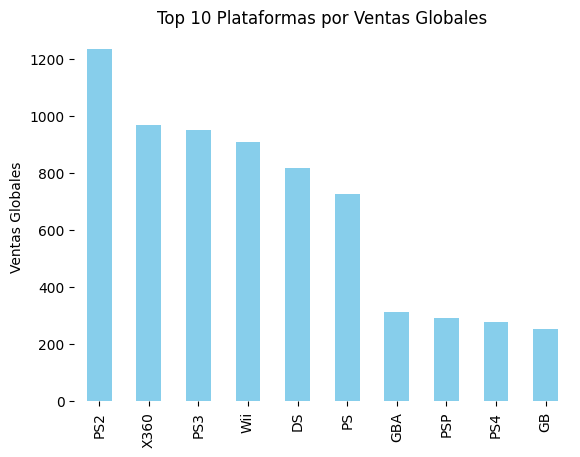

In [ ]:
# Agrupa por plataforma y suma las ventas globales
ventas_por_plataforma = df_ventas_juegos.groupby('Plataforma')['Ventas'].sum()

# Ordena las plataformas por ventas globales en orden descendente y toma las primeras 10
top_10_plataformas = ventas_por_plataforma.sort_values(ascending=False).head(10)

# Crea el gráfico de barras
ax = top_10_plataformas.plot(kind='bar', color='skyblue')  # Guarda el objeto Axes en ax
plt.title('Top 10 Plataformas por Ventas Globales')
plt.ylabel('Ventas Globales')
plt.xlabel('')
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para una mejor visualización

# Ocultar los bordes de la gráfica
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

La gráfica destaca el dominio de la PS2 en ventas globales. Hay una fuerte presencia de consolas de sobremesa, pero también es notable el impacto de las consolas portátiles en el mercado. PlayStation ha mantenido una presencia constante a lo largo de los años, y varias de sus consolas aparecen en el top 10.

La Xbox 360 (X360) y la PlayStation 3 (PS3) siguen a la PS2 en ventas, lo que indica la popularidad y la competencia entre estas consolas de sobremesa durante sus respectivos períodos de lanzamiento

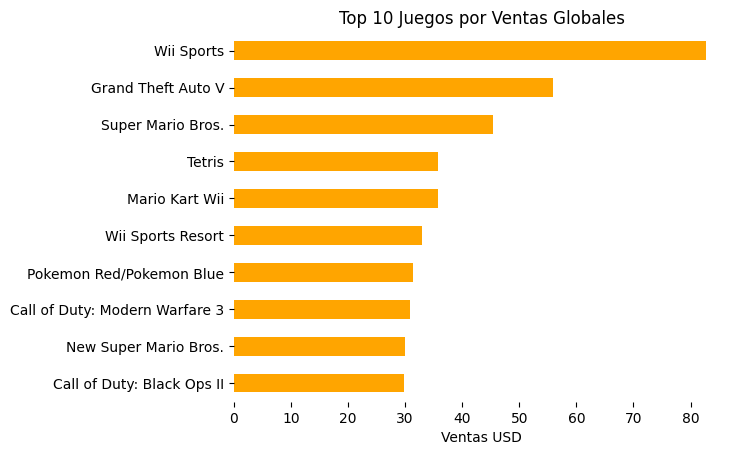

In [ ]:
# Agrupa por plataforma y suma las ventas globales
ventas_por_plataforma = df_ventas_juegos.groupby('Nombre')['Ventas'].sum()

# Ordena las plataformas por ventas globales en orden descendente y toma las primeras 10
top_10_plataformas = ventas_por_plataforma.sort_values(ascending=True).tail(10)  # Nota: ascending=True para que las barras estén ordenadas de menor a mayor en el gráfico

# Crea el gráfico de barras horizontales
ax = top_10_plataformas.plot(kind='barh', color='orange')
plt.title('Top 10 Juegos por Ventas Globales')

# Elimina las etiquetas de los ejes
plt.xlabel('Ventas USD')
plt.ylabel('')

# Ocultar los bordes de la gráfica
for spine in ax.spines.values():
    spine.set_visible(False)

# Muestra el gráfico
plt.show()

La gráfica muestra una combinación de títulos icónicos y juegos más nuevos que han logrado un gran impacto en ventas. Las franquicias de Nintendo, como Mario y Pokémon, junto con series populares como Grand Theft Auto y Call of Duty, demuestran su relevancia y popularidad en la industria de los videojuegos.

"Super Mario Bros." y "Tetris" son títulos icónicos que han resistido la prueba del tiempo, lo que se refleja en sus altas ventas.La lista incluye una variedad de géneros, desde deportes y carreras hasta shooters y juegos de aventuras, lo que indica una diversidad en las preferencias de los jugadores a nivel global.

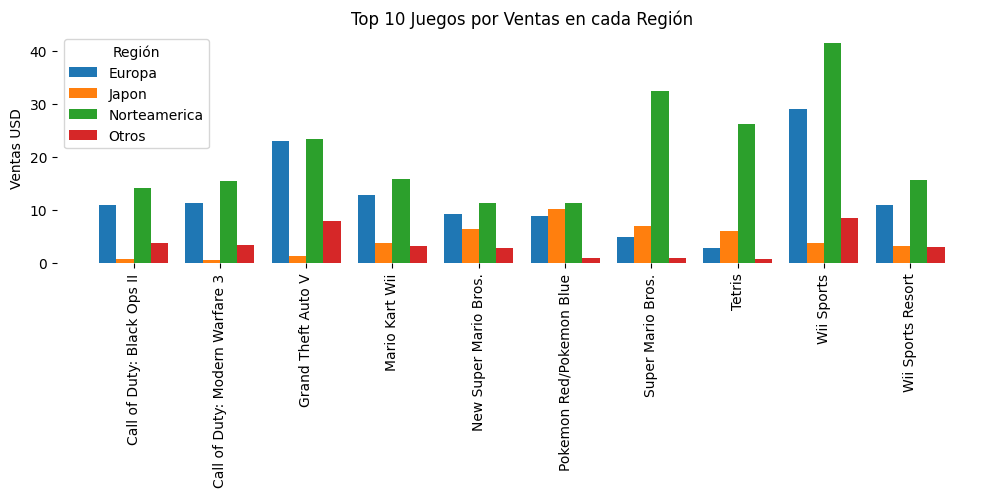

In [ ]:
# 1. Agrupación de Datos
grupo = df_ventas_juegos.groupby(['Nombre']).Ventas.sum().nlargest(10).index
top_10 = df_ventas_juegos[df_ventas_juegos['Nombre'].isin(grupo)].groupby(['Nombre', 'Region']).Ventas.sum().unstack().fillna(0)

# 2. Visualización
bar_width = 0.2
index = np.arange(len(top_10))

# Ajustar el tamaño aquí
fig, ax = plt.subplots(figsize=(12, 3))

for i, region in enumerate(top_10.columns):
    ax.bar(index + i*bar_width, top_10[region], bar_width, label=region)
    
    # Ocultar los bordes de la gráfica
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title('Top 10 Juegos por Ventas en cada Región')
ax.set_xlabel('')
ax.set_ylabel('Ventas USD')
ax.set_xticks(index + bar_width * (len(top_10.columns)/2 - 0.5))
ax.set_xticklabels(top_10.index)
plt.xticks(rotation=90)
ax.legend(title='Región')

plt.show()


Juegos como Wii Sports y los títulos de Mario tienen un amplio atractivo en varias regiones, mientras que juegos como Pokemon Red/Pokemon Blue tienen un rendimiento especialmente bueno en Japón. Además, es interesante observar cómo ciertos juegos populares en occidente, como Call of Duty y Grand Theft Auto, tienen menos presencia en el mercado japonés según este gráfico.

Esta gráfica destaca las diferencias y similitudes en las preferencias de juegos según la región. Mientras que algunos títulos tienen un atractivo global, otros muestran una preferencia regional marcada, lo que puede reflejar diferencias culturales y de mercado.


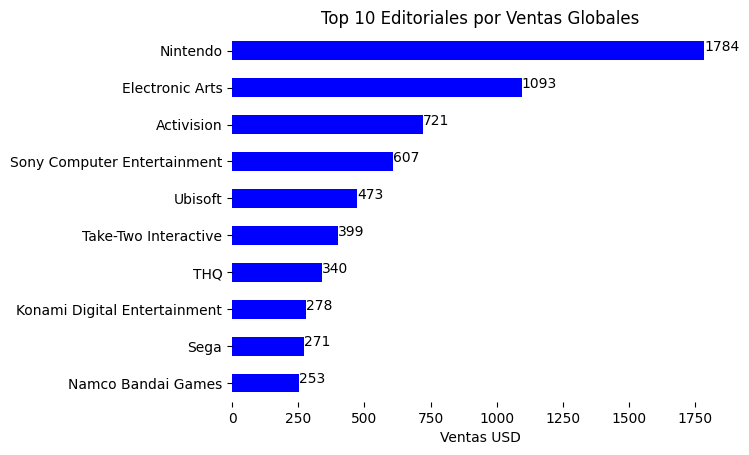

In [ ]:
# Agrupa por editorial y suma las ventas globales
ventas_por_editorial = df_ventas_juegos.groupby('Editorial')['Ventas'].sum()

# Ordena las plataformas por ventas globales en orden descendente y toma las primeras 10
top_10_editorial = ventas_por_editorial.sort_values(ascending=True).tail(10)  # Nota: ascending=True para que las barras estén ordenadas de menor a mayor en el gráfico

# Crea el gráfico de barras horizontales
ax = top_10_editorial.plot(kind='barh', color='blue')
plt.title('Top 10 Editoriales por Ventas Globales')

# Elimina las etiquetas de los ejes
plt.xlabel('Ventas USD')
plt.ylabel('')

# Agrega etiquetas de datos a las barras
for index, value in enumerate(top_10_editorial):
    ax.text(value, index, f'{value:.0f}')

    # Ocultar los bordes de la gráfica
for spine in ax.spines.values():
    spine.set_visible(False)

# Muestra el gráfico
plt.show()

Nintendo encabeza las ventas globales entre las editoriales de videojuegos con 1784 unidades, seguido de cerca por gigantes como Electronic Arts y Activision. Sony Computer Entertainment, representando la división de juegos de Sony, ostenta una posición prominente, mientras que Ubisoft y Take-Two Interactive también muestran ventas notables. Además, la competencia es reñida entre THQ, Konami, Sega y Namco Bandai, que presentan cifras de ventas similares. Esta gráfica subraya la influencia y diversidad de las principales editoriales en la industria del videojuego, reflejando las tendencias y preferencias de los consumidores a lo largo del tiempoTop 10 Editoriales por Región

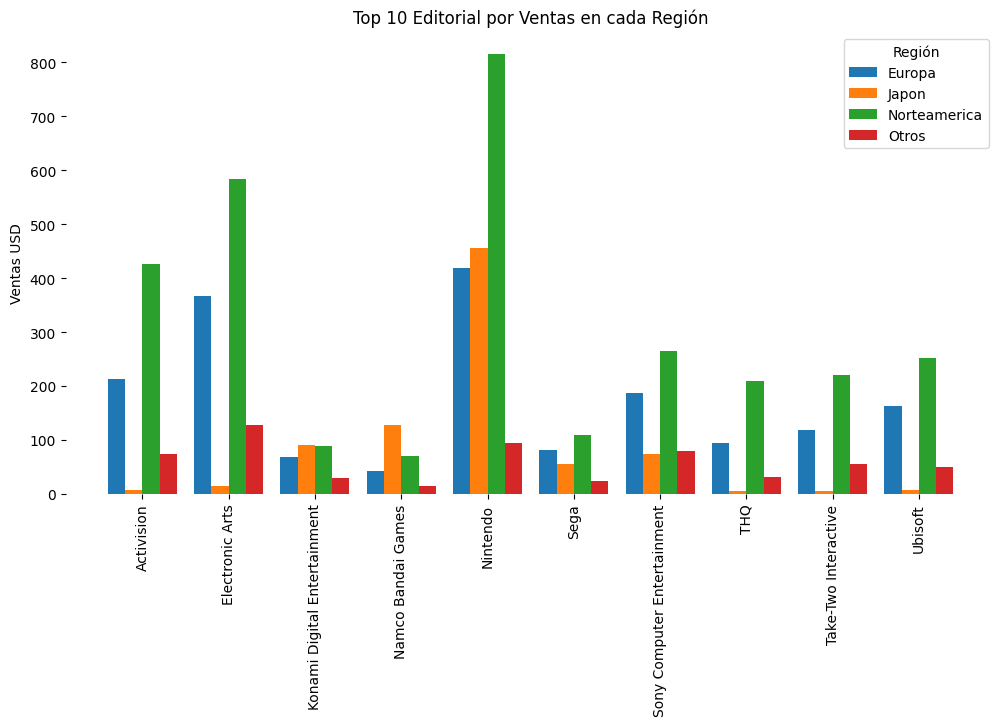

In [ ]:
# 1. Agrupación de Datos
grupo = df_ventas_juegos.groupby(['Editorial']).Ventas.sum().nlargest(10).index

top_10 = df_ventas_juegos[df_ventas_juegos['Editorial'].isin(grupo)].groupby(['Editorial', 'Region']).Ventas.sum().unstack().fillna(0)

# 2. Visualización
bar_width = 0.2
index = np.arange(len(top_10))

fig, ax = plt.subplots(figsize=(12, 6))

for i, region in enumerate(top_10.columns):
    ax.bar(index + i*bar_width, top_10[region], bar_width, label=region)
    
    # Ocultar los bordes de la gráfica
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title('Top 10 Editorial por Ventas en cada Región')
ax.set_xlabel('')
ax.set_ylabel('Ventas USD')
ax.set_xticks(index + bar_width * (len(top_10.columns)/2 - 0.5))
ax.set_xticklabels(top_10.index)
plt.xticks(rotation=90)
ax.legend(title='Región')

plt.show()

La editorial "Nintendo" muestra una prominencia abrumadora en Norteamerica con respecto a las otras regiones. Esto puede indicar una mayor presencia de títulos populares exclusivos para esa región.

En la mayoría de las editoriales, las barras de Norteamérica (en verde) y Europa (en azul) tienden a tener alturas similares. Esto sugiere que hay una similitud en las preferencias de videojuegos o en las estrategias de marketing entre estas dos regiones para estas editoriales.


Editoriales como "Electronic Arts" y "Ubisoft" muestran ventas más equilibradas entre Europa, Norteamérica y, en menor medida, Japón. Esto puede ser indicativo de una estrategia de mercado global o de títulos que tienen un atractivo universal.

Editoriales con baja presencia en Japón: "Activision", "Take-Two Interactive" y "THQ" muestran ventas más bajas en Japón en comparación con Europa y Norteamérica. Esto puede deberse a una variedad de factores, como una menor presencia en el mercado japonés o preferencias culturales diferentes en esa región.


La categoría "Otros" generalmente tiene ventas más bajas en comparación con las tres regiones principales en casi todas las editoriales. Sin embargo, es notable que esta categoría tiene ventas comparables o incluso superiores a Japón en editoriales como "Activision" y "Take-Two Interactive".

Konami y Sega: Estas dos editoriales muestran un comportamiento interesante en el que, a pesar de ser editoriales originarias de Japón, sus ventas en Europa y Norteamérica son comparables o incluso superiores a las de su región de origen.


En resumen, hay claras diferencias en las preferencias y comportamientos de compra entre las regiones. Japón muestra una fuerte inclinación hacia ciertas editoriales, mientras que Europa y Norteamérica tienden a tener patrones más similares entre sí. La categoría "Otros" generalmente tiene un desempeño más modesto, pero hay excepciones notables según la editorial.

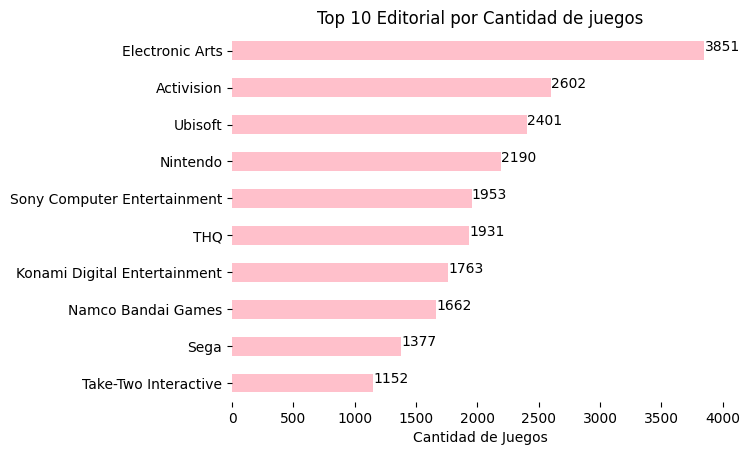

In [ ]:
# Agrupa por plataforma y suma las ventas globales
ventas_por_plataforma = df_ventas_juegos.groupby('Editorial')['Nombre'].count()

# Ordena las plataformas por ventas globales en orden descendente y toma las primeras 10
top_10_Editorial = ventas_por_plataforma.sort_values(ascending=True).tail(10)  # Nota: ascending=True para que las barras estén ordenadas de menor a mayor en el gráfico

# Crea el gráfico de barras horizontales
ax = top_10_Editorial.plot(kind='barh', color='pink')
plt.title('Top 10 Editorial por Cantidad de juegos')

# Elimina las etiquetas de los ejes
plt.xlabel('Cantidad de Juegos')
plt.ylabel('')

# Agrega etiquetas de datos a las barras
for index, value in enumerate(top_10_Editorial):
    ax.text(value, index, f'{value:.0f}')

# Ocultar los bordes de la gráfica
for spine in ax.spines.values():
    spine.set_visible(False)
    
# Muestra el gráfico
plt.show()

No hay una correlación directa entre la cantidad de juegos producidos por una editorial y las ventas globales que genera. Nintendo es un claro ejemplo de que una menor producción puede traducirse en mayores ventas si los títulos son de alta calidad o tienen una gran demanda en el mercado. Por otro lado, empresas como EA y Activision, que producen una gran cantidad de juegos, no necesariamente lideran en ventas globales, lo que puede sugerir una estrategia centrada en la cantidad y variedad de títulos. Es esencial considerar otros factores, como la calidad del juego, el marketing, la fidelidad de la marca y las tendencias del mercado, al interpretar estas cifras

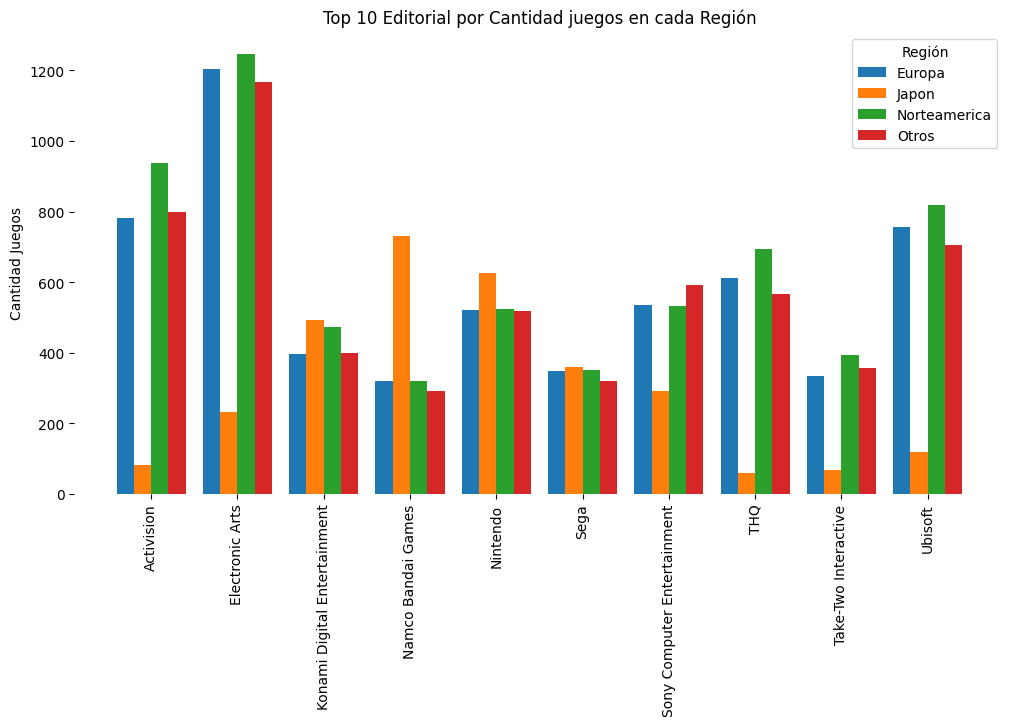

In [ ]:
# 1. Agrupación de Datos
grupo = df_ventas_juegos.groupby(['Editorial']).Nombre.count().nlargest(10).index

top_10 = df_ventas_juegos[df_ventas_juegos['Editorial'].isin(grupo)].groupby(['Editorial', 'Region']).Nombre.count().unstack().fillna(0)

# 2. Visualización
bar_width = 0.2
index = np.arange(len(top_10))

fig, ax = plt.subplots(figsize=(12, 6))

for i, region in enumerate(top_10.columns):
    ax.bar(index + i*bar_width, top_10[region], bar_width, label=region)
    
    # Ocultar los bordes de la gráfica
for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title('Top 10 Editorial por Cantidad juegos en cada Región')
ax.set_xlabel('')
ax.set_ylabel('Cantidad Juegos')
ax.set_xticks(index + bar_width * (len(top_10.columns)/2 - 0.5))
ax.set_xticklabels(top_10.index)
plt.xticks(rotation=90)
ax.legend(title='Región')

plt.show()

Activision, Electronic Arts y Nintendo dominan el mercado en términos de distribución de juegos a nivel global. Es especialmente destacable cómo Nintendo ha establecido una sólida presencia en Japón, lo cual es coherente con su origen japonés. Por otro lado, Konami Digital Entertainment, sin ser el líder global en términos de producción total de juegos, ha marcado una influencia significativa en Japón, probablemente reflejando sus raíces en ese país. THQ y Take-Two Interactive muestran una distribución equilibrada en todas las regiones, sin tener una predominancia marcada en ninguna de ellas. Sony Computer Entertainment, por su parte, se destaca notablemente en Europa y Norteamérica, pero no es tan prominente en Japón, a pesar de su vasta producción. Ubisoft refuerza su legado europeo con una presencia marcada en esa región, lo cual es un testimonio de sus raíces francesas. Finalmente, la categoría "Otros" nos demuestra que las editoriales están ampliando horizontes, evidenciando una presencia global y una estrategia de diversificación de mercados más allá de las regiones principales

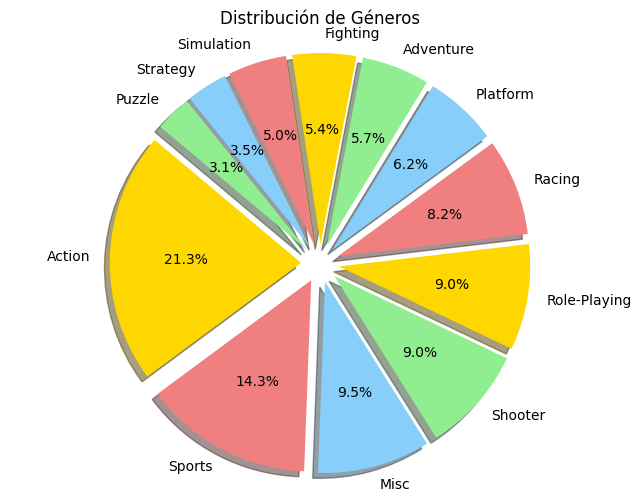

In [ ]:
 # Calcular la distribución de géneros
genero_counts = df_ventas_juegos['Genero'].value_counts()
 
# Crear un gráfico de pastel
plt.figure(figsize=(8, 6))  # Establece el tamaño de la figura
 
# Etiqueta los géneros
labels = genero_counts.index
# Valores de cada sección del pastel
sizes = genero_counts.values
 
# Colores para cada sección (puedes personalizarlos)
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']
 
# Explode es una lista para separar una o más secciones del pastel
explode = [0.1] * len(sizes)  # Todas las secciones explotarán ligeramente
 
# Crea el gráfico de pastel
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
 
# Título
plt.title('Distribución de Géneros')
 
# Muestra el gráfico de pastel
plt.axis('equal')  # Aspecto igual para que sea un círculo
plt.show()

Los videojuegos de acción son los más populares, seguidos de los deportivos. Los juegos de estrategia, rompecabezas y simulación parecen ser menos populares en comparación con los otros géneros presentados en esta gráfica.

# CONCLUSIONES

Dominio de las Grandes Editoriales: Electronic Arts, Activision y Ubisoft son las editoriales dominantes en términos de producción de juegos, con Electronic Arts a la cabeza. Esta dominancia sugiere que tienen una infraestructura fuerte, recursos y capacidades de marketing que les permiten mantener una posición de liderazgo en la industria.

Diversificación Regional: A pesar de su origen, muchas de estas editoriales han diversificado su presencia en distintas regiones. Por ejemplo, Nintendo tiene una fuerte presencia en Japón, su país de origen, pero también tiene un impacto considerable en otras áreas. La categoría "Otros" también sugiere una tendencia hacia la globalización y la diversificación en mercados emergentes.

Influencia Cultural en la Distribución: Las raíces culturales y regionales de una editorial pueden influir en su dominio regional. Por ejemplo, Nintendo y Konami tienen una presencia significativa en Japón, reflejando sus raíces japonesas, mientras que Ubisoft, de origen francés, muestra una fuerte presencia en Europa.

Diversidad de Géneros: El género "Action" lidera el mercado en términos de ventas, seguido de cerca por "Sports" y "Shooter". Sin embargo, la industria del videojuego es diversa, y hay una amplia variedad de géneros que atraen a diferentes segmentos de jugadores. Es esencial para las editoras comprender las preferencias de género de su público objetivo para maximizar las ventas y la retención de jugadores.

Importancia de la Diversificación: Las editoriales más grandes no se limitan a una región o género específico. La diversificación, tanto en términos de mercados regionales como de géneros de juegos, parece ser una estrategia clave para mantener la relevancia y el éxito en la industria del videojuego.

Ejercicio Académico Realizado por: Alexandra Garcia - Alejandro Ocampo - Luis Sanchez - 2023.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0b4257da-3cb8-4a1a-a212-9e2fffdf5df7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>